In [38]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [39]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HPG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [40]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [41]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [42]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30.33599213 30.34014167 30.3442912  30.34844074 30.35259028 30.35673981
 30.36088935 30.36503889 30.36918843 30.37333796 30.3774875  30.38163704
 30.38578658 30.38993611 30.39408565 30.39823519 30.40238472 30.40653426
 30.4106838  30.41483334 30.41898287 30.42313241 30.42728195 30.43143148
 30.43558102 30.43973056 30.4438801  30.44802963 30.45217917 30.45632871]


In [43]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 18.70306549146897
Testing MAPE: 174.6277025802569
Testing MAE: 18.650299043755798


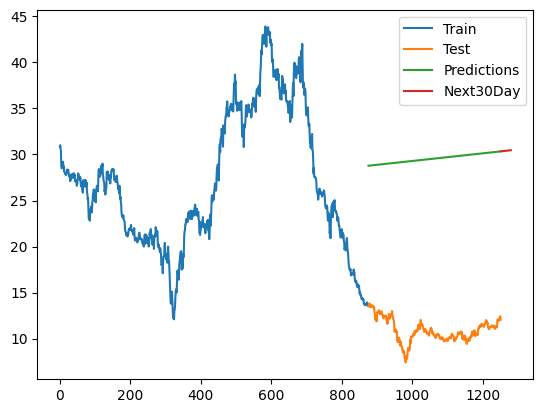

In [44]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [45]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[30.33599213 30.34014167 30.3442912  30.34844074 30.35259028 30.35673981
 30.36088935 30.36503889 30.36918843 30.37333796 30.3774875  30.38163704
 30.38578658 30.38993611 30.39408565 30.39823519 30.40238472 30.40653426
 30.4106838  30.41483334 30.41898287 30.42313241 30.42728195 30.43143148
 30.43558102 30.43973056 30.4438801  30.44802963 30.45217917 30.45632871
 30.46047825 30.46462778 30.46877732 30.47292686 30.47707639 30.48122593
 30.48537547 30.48952501 30.49367454 30.49782408 30.50197362 30.50612315
 30.51027269 30.51442223 30.51857177 30.5227213  30.52687084 30.53102038
 30.53516992 30.53931945 30.54346899 30.54761853 30.55176806 30.5559176
 30.56006714 30.56421668 30.56836621 30.57251575 30.57666529 30.58081482]


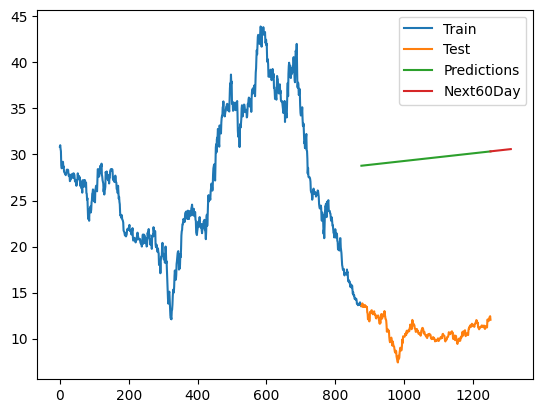

In [46]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [47]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[30.33599213 30.34014167 30.3442912  30.34844074 30.35259028 30.35673981
 30.36088935 30.36503889 30.36918843 30.37333796 30.3774875  30.38163704
 30.38578658 30.38993611 30.39408565 30.39823519 30.40238472 30.40653426
 30.4106838  30.41483334 30.41898287 30.42313241 30.42728195 30.43143148
 30.43558102 30.43973056 30.4438801  30.44802963 30.45217917 30.45632871
 30.46047825 30.46462778 30.46877732 30.47292686 30.47707639 30.48122593
 30.48537547 30.48952501 30.49367454 30.49782408 30.50197362 30.50612315
 30.51027269 30.51442223 30.51857177 30.5227213  30.52687084 30.53102038
 30.53516992 30.53931945 30.54346899 30.54761853 30.55176806 30.5559176
 30.56006714 30.56421668 30.56836621 30.57251575 30.57666529 30.58081482
 30.58496436 30.5891139  30.59326344 30.59741297 30.60156251 30.60571205
 30.60986159 30.61401112 30.61816066 30.6223102  30.62645973 30.63060927
 30.63475881 30.63890835 30.64305788 30.64720742 30.65135696 30.65550649
 30.6

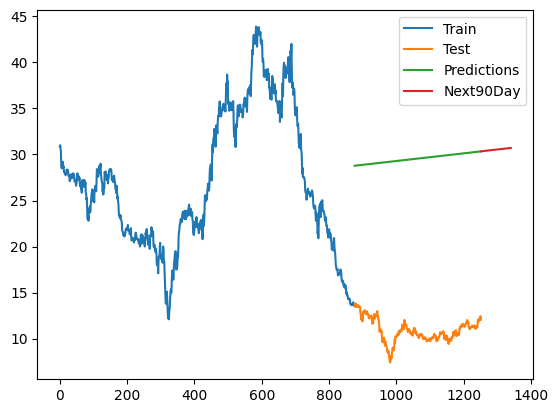

In [48]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()